In [2]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

def sigmoid(x): return 1/(1+np.exp(-x))
def sigmoid_deriv(x): return x*(1-x)
def relu(x): return np.maximum(0,x)
def relu_deriv(x): return (x>0).astype(float)

def train(X, y, lr=0.1, epochs=5000, act="sigmoid"):
    w1 = np.random.randn(2,2); b1 = np.zeros((1,2))
    w2 = np.random.randn(2,1); b2 = np.zeros((1,1))
    for _ in range(epochs):
        z1 = X.dot(w1)+b1
        a1 = sigmoid(z1) if act=="sigmoid" else relu(z1)
        z2 = a1.dot(w2)+b2
        a2 = sigmoid(z2)
        dz2 = (a2-y)*sigmoid_deriv(a2)
        dw2 = a1.T.dot(dz2); db2 = np.sum(dz2,0,keepdims=True)
        dz1 = dz2.dot(w2.T)*(sigmoid_deriv(a1) if act=="sigmoid" else relu_deriv(a1))
        dw1 = X.T.dot(dz1); db1 = np.sum(dz1,0,keepdims=True)
        w1 -= lr*dw1; b1 -= lr*db1
        w2 -= lr*dw2; b2 -= lr*db2
    return w1,b1,w2,b2

def predict(X,w1,b1,w2,b2,act="sigmoid"):
    z1 = X.dot(w1)+b1
    a1 = sigmoid(z1) if act=="sigmoid" else relu(z1)
    z2 = a1.dot(w2)+b2
    return sigmoid(z2)

In [3]:
w1,b1,w2,b2 = train(X,y,lr=0.1,epochs=5000,act="sigmoid")
y_pred = predict(X,w1,b1,w2,b2)
y_cls = (y_pred>0.5).astype(int)

In [4]:
acc = np.mean(y_cls==y)
tp = np.sum((y_cls==1)&(y==1))
fp = np.sum((y_cls==1)&(y==0))
fn = np.sum((y_cls==0)&(y==1))
prec = tp/(tp+fp+1e-9)
rec = tp/(tp+fn+1e-9)
f1 = 2*prec*rec/(prec+rec+1e-9)
fpr,tpr,_ = roc_curve(y,y_pred)
roc_auc = auc(fpr,tpr)

print("Accuracy:",acc)
print("Precision:",prec)
print("Recall:",rec)
print("F1:",f1)
print("ROC AUC:",roc_auc)

Accuracy: 0.5
Precision: 0.49999999975
Recall: 0.49999999975
F1: 0.49999999924999994
ROC AUC: 0.75


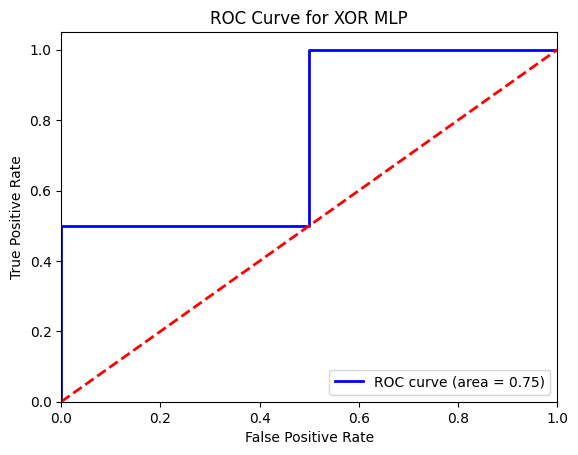

In [5]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='red', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XOR MLP')
plt.legend(loc="lower right")
plt.show()